In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
matches_df = pd.read_csv('/content/matches_cleaned.csv')
deliveries_df = pd.read_csv('/content/deliveries_cleaned (1).csv')

In [20]:
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [21]:
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,NaN,NaN


In [22]:
merged_df = pd.merge(matches_df, deliveries_df, on='match_id', how='inner')

In [23]:
merged_df.shape

(260920, 36)

In [24]:
merged_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,NaN,NaN
1,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,NaN,NaN


In [33]:
temp_df = merged_df[(merged_df['batting_team'] == merged_df['winner']) & (merged_df['inning'] == 1)][['match_id','batting_team','bowling_team','winner']]
len_of_batting = len(temp_df.groupby('match_id'))


500

In [35]:
temp_df = merged_df[(merged_df['bowling_team'] == merged_df['winner']) & (merged_df['inning'] == 1)][['match_id','batting_team','bowling_team','winner']]
len_of_bowling = len(temp_df.groupby('match_id'))

590

In [39]:
# # Percentage of winning for Teams who does 'batting' in 1st innings
total = len_of_batting + len_of_bowling
batting = (len_of_batting/total)*100
batting

45.87155963302752

In [40]:
# Percentage of winning for Teams who does 'bowling' in 1st innings
total = len_of_batting + len_of_bowling
bowling = (len_of_bowling/total)*100
bowling

54.12844036697248

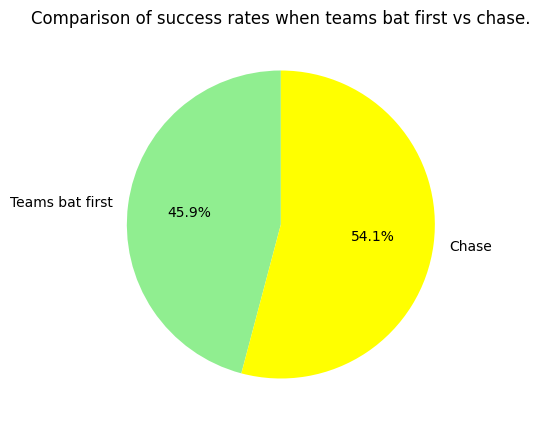

In [52]:
values = [batting,bowling]
plt.figure(figsize=(5, 5))
labels = ['Teams bat first', 'Chase']
plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'yellow'])
plt.title('Comparison of success rates when teams bat first vs chase.')
plt.show()